In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
cab = pd.read_csv("YourCabs.csv")
cab.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,NaN,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,NaN,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,NaN,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [239]:
cab.shape

(43431, 19)

In [240]:
cab.isna().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

### Checking the % of the column that is NA and then removing it if the % is too high

In [241]:
cab.to_city_id.isna().sum() * 100 / cab.shape[0]

96.34362552094126

In [242]:
cab.from_city_id.isna().sum() * 100 / cab.shape[0]

62.365591397849464

In [243]:
cab.package_id.isna().sum() * 100 / cab.shape[0]

82.61610370472704

In [244]:
cab.to_date.isna().sum() * 100 / cab.shape[0]

41.19177545992494

In [245]:
cab.drop(["to_city_id","from_city_id", "package_id","to_date"],axis=1, inplace = True)

In [246]:
# dropping some other non required columns

cab.drop(["id", "user_id"], axis = 1, inplace = True)

cab.shape

(43431, 13)

In [247]:
cab.vehicle_model_id.value_counts().head()

12    31859
85     2407
89     2391
65     1912
28     1702
Name: vehicle_model_id, dtype: int64

In [248]:
31859/cab.shape[0]

0.7335543736041077

In [249]:
# Dropping this as 73% of the data belongs to vehicle ID 12

cab.drop("vehicle_model_id", axis = 1, inplace = True)

cab.shape

(43431, 12)

### Checking other NA values

In [250]:
cab.isna().sum()

travel_type_id            0
from_area_id             88
to_area_id             9138
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 9138
to_long                9138
Car_Cancellation          0
dtype: int64

### Filling NA values

In [251]:
cab.from_lat.fillna(cab.from_lat.median(), inplace = True)
cab.from_long.fillna(cab.from_long.median(), inplace = True)
cab.to_lat.fillna(cab.to_lat.median(), inplace = True)
cab.to_long.fillna(cab.to_long.median(), inplace = True)

In [252]:
cab.from_area_id.fillna(cab.from_area_id.median(), inplace = True)
cab.to_area_id.fillna(cab.to_area_id.median(), inplace = True)

In [253]:
cab.isna().sum()

travel_type_id         0
from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

### Checking for Outliers

- There don't seem to be any outliers.
- Area code is just a number to identify the area and can vary

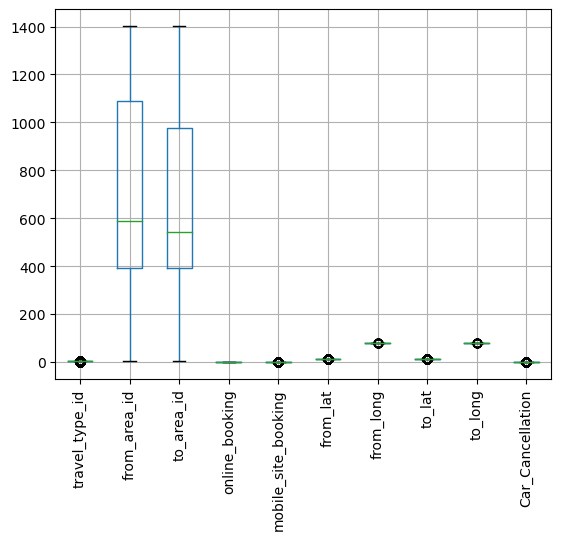

In [254]:
cab.boxplot()
plt.xticks(rotation = 90)
plt.show()

### Appending Columns

#### There are 3 unique entries for travel type and we can create a different column for each to get the travel type for each customer

#### Label Encoder is not required as the values are not strings

In [255]:
cab.travel_type_id.value_counts()

2    34292
3     7550
1     1589
Name: travel_type_id, dtype: int64

In [256]:
travel_type = pd.get_dummies(cab.travel_type_id)
travel_type

,1,2,3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
43426,0,1,0
43427,0,1,0
43428,0,0,1
43429,0,1,0


In [257]:
travel_type.rename(columns={1:"long", 2:"short", 3:"hourly"}, inplace = True)
travel_type

,long,short,hourly
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
43426,0,1,0
43427,0,1,0
43428,0,0,1
43429,0,1,0


In [258]:
cab = pd.concat([cab, travel_type], axis = 1)
cab = cab.drop("travel_type_id", axis = 1)

In [259]:
cab.drop("long", axis = 1, inplace = True)

In [260]:
cab.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,short,hourly
0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,1,0
1,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,0
2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,0
3,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,0
4,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,0


### It would be easier to see if the cab is cancelled or not based on distance to be covered rather than the longitudes and latitudes information

In [261]:
from math import sin, cos, sqrt, atan2, radians
R = 6370

def calculate_distance_covered(from_lat,from_long,to_lat,to_long):
    dlon = from_long - to_long
    dlat = from_lat - to_lat
    
    a = sin(dlat / 2)**2 + cos(from_lat) * cos(to_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance
    
    
print (calculate_distance_covered)

<function calculate_distance at 0x000002408AC69CA0>


In [262]:
distance_travelled = cab.apply(lambda row: calculate_distance_covered(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']), axis = 1)

distance_travelled

0         218.823289
1         767.333718
2         725.135666
3         514.156403
4         833.639597
            ...     
43426     600.005202
43427    1208.630447
43428     767.787001
43429     257.414166
43430    1454.416513
Length: 43431, dtype: float64

In [263]:
cab = pd.concat([cab,distance_travelled], axis = 1)
cab.rename(columns={0:"distance"}, inplace = True)
cab.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,short,hourly,distance
0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,1,0,218.823289
1,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,0,767.333718
2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,0,725.135666
3,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,0,514.156403
4,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,0,833.639597


In [264]:
cab = cab.drop(['from_lat','from_long','to_lat','to_long'],axis=1)
cab.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,short,hourly,distance
0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,0,1,0,218.823289
1,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,0,1,0,767.333718
2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,0,1,0,725.135666
3,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,0,1,0,514.156403
4,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,0,1,0,833.639597


### The area ID column is no use for us but we want the information as to how many times was a cab cancelled from a particular area

In [320]:
# Here we are calculating, how many times was the cab cancelled

cab.area_info = cab.groupby('from_area_id')['Car_Cancellation'].sum()/cab.groupby('from_area_id')['Car_Cancellation'].count()

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_4660\3181778578.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cab.area_info = cab.groupby('from_area_id')['Car_Cancellation'].sum()/cab.groupby('from_area_id')['Car_Cancellation'].count()


In [275]:
# cab.from_area_id.unique()

In [321]:
cab.area_cancel_info = cab.area_info.replace({(0, 0.4) : "Low",
                                             (0.4,0.75) : "Average",
                                             (0.75,1) : "High"}                           

SyntaxError: unexpected EOF while parsing (1760835608.py, line 3)

### Data Visualization

In [292]:
x = cab[["online_booking", "mobile_site_booking", "short", "hourly", "distance"]]
y = cab.Car_Cancellation

In [307]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

### Logistic Regression

- Since this is a classification regression, we are going for logistic regression

In [308]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\Bhavya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [319]:
y_pred=reg.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [322]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[8064,    0],
       [ 623,    0]], dtype=int64)

In [325]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))

Accuracy:  0.9282836422240129
Precision:  0.0
Recall:  0.0


C:\Users\Bhavya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### It can be seen from the conusion matrix that the logistic regression model is a good fit
#### There is no FALSE prediction
#### Accuracy score is also in the acceptable range of 93% with 0 recall

In [326]:
#### Above, we are predicting a situation where the booking was made by phone call for a long distance of 250km

#### It has been predicted that this booking will be cancelled so the cab company should not take this booking

reg.predict([[0,0,0,0,250]])

C:\Users\Bhavya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Decision Tree - GINI

In [330]:
from sklearn.tree import DecisionTreeClassifier

In [332]:
Depth_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

Depth_2.fit(x_train,y_train)

Depth_2_score_train = Depth_2.score(x_train,y_train)

Depth_2_score_test = Depth_2.score(x_test,y_test)

print('Training Score',Depth_2_score_train)
print('Testing Score',Depth_2_score_test)

Training Score 0.9277860925627447
Testing Score 0.9282836422240129


In [333]:
Depth_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

Depth_4.fit(x_train,y_train)

Depth_4_score_train = Depth_4.score(x_train,y_train)

Depth_4_score_test = Depth_4.score(x_test,y_test)

print('Training Score',Depth_4_score_train)
print('Testing Score',Depth_4_score_test)

Training Score 0.9278436564586692
Testing Score 0.9278231840681478


In [334]:
Depth_10 = DecisionTreeClassifier(random_state=1,max_depth=10)

Depth_10.fit(x_train,y_train)

Depth_10_score_train = Depth_10.score(x_train,y_train)

Depth_10_score_test = Depth_10.score(x_test,y_test)

print('Training Score',Depth_10_score_train)
print('Testing Score',Depth_10_score_test)

Training Score 0.9308081970987796
Testing Score 0.9278231840681478


In [335]:
Depth_40 = DecisionTreeClassifier(random_state=1,max_depth=40)

Depth_40.fit(x_train,y_train)

Depth_40_score_train = Depth_40.score(x_train,y_train)

Depth_40_score_test = Depth_40.score(x_test,y_test)

print('Training Score',Depth_40_score_train)
print('Testing Score',Depth_40_score_test)

Training Score 0.9564241307851715
Testing Score 0.9174628755611833


#### As we increase the tree branched for the DECISION TREE classifier, we can see that the training score is improving but the test score is increasing. But increasing branches might lead to over fitting the data.

#### Since there is not much change in score till 10 branches, we can use DEPTH 10 as a good fit with GINI TEST


In [338]:
#### Above, we are predicting a situation where the booking was made by phone call for a long distance of 250km

#### It has been predicted that this booking will be cancelled so the cab company should not take this booking

### Prediction is same as predicted by logistic regression

print(Depth_2.predict([[0,0,0,0,250]]))
print(Depth_4.predict([[0,0,0,0,250]]))
print(Depth_10.predict([[0,0,0,0,250]]))
print(Depth_40.predict([[0,0,0,0,250]]))

[0]
[0]
[0]
[0]


C:\Users\Bhavya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bhavya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bhavya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bhavya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### DESICION TREE - ENTROPY

In [339]:
ent = DecisionTreeClassifier(max_depth=10,criterion='entropy')

ent.fit(x_train,y_train)

ent_score_train = ent.score(x_train,y_train)
print(model_dt_score_train)

ent_score_test = ent.score(x_test,y_test)
print(model_dt_score_test)

0.9307218512548929
0.9269022677564176


In [340]:
ent.predict([[0,0,0,0,250]])

C:\Users\Bhavya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# It can be seen that the train and test data are a good fit with all the models (logistic regression, desicion tree (gini and entropy)), have a good accuracy score and are predicting the same result for the given situation